# Data Processing
We load our data which are digits and their labels as pandas dataframe object



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("smalldigits.csv", header=None)
df = df.sample(frac=1, random_state=42, axis=0)  # Randomise dataframe
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
1245,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,1,1,1,0,6
220,0,0,1,1,1,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,9
1518,0,0,1,1,1,0,0,0,0,1,...,0,0,0,1,1,1,1,0,0,3
438,0,0,0,1,1,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,7
1270,0,0,1,1,1,0,0,0,0,1,...,0,0,0,1,1,1,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0,0,1,1,1,1,0,0,0,1,...,0,0,0,1,1,1,1,0,0,3
1294,0,0,1,1,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,7
860,0,0,1,1,1,1,0,0,0,0,...,0,0,0,1,1,1,1,0,0,2
1459,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,7


# Test-train data split

In [2]:
n_rows = df.shape[0]
labels = df.iloc[:, -1]  # This selects all rows of the last column
labels_size = labels.shape[0]
print("Size of labels array:", labels_size)
print("\nFirst few labels:\n", labels.head())
#Training digits
train_digits = df.iloc[:int(n_rows * 0.9), :-1].to_numpy()
train_labels = df.iloc[:int(n_rows * 0.9), -1].to_numpy()

#print("train_digits: \n", train_digits)
#print("\ntrain_labels: \n", train_labels)

#Testing digits
test_digits = df.iloc[int(n_rows * 0.9):, :-1].to_numpy()
test_labels = df.iloc[int(n_rows * 0.9):, -1].to_numpy()

Size of labels array: 1797

First few labels:
 1245    6
220     9
1518    3
438     7
1270    2
Name: 64, dtype: int64


**Note:**
- `train_digits` - train features
- `train_labels` - train labels
- `test_digits` - test features
- `test_labels` - test labels

We define a **Helper function** to help visualise a single digit using the `matplot` library



Label = 6


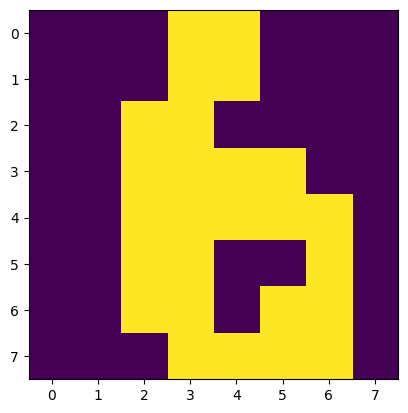

In [3]:
def visualize_digit(digit):
    plt.imshow(digit.reshape(8,8),cmap='viridis')

print(f"Label = {train_labels[0]}")
visualize_digit(train_digits[0])

We compute the **prior** probabilities for each class. These values should be stored in the numpy array `priors`, with the prior for label 0 being at index 0 of the `priors`, label 1 being at index 1 and so on.

In [4]:
priors=np.zeros(10)
priors=np.zeros(10)
counts=np.zeros(10)  

for i in range(labels_size):
    num=labels[i]
    counts[num]+= 1

count=0
for j in range(10):
    prior_probability=counts[j] / labels_size  
    priors[j]=prior_probability 
    count+=prior_probability  

priors, count##Used count to check whether the calculated values are correct as it should be equal to 1 in the end

(array([0.09905398, 0.10127991, 0.0984975 , 0.10183639, 0.10072343,
        0.10127991, 0.10072343, 0.09961046, 0.09682805, 0.10016694]),
 np.float64(1.0))

Here we calculate the class conditionals with Laplacian smoothing and assign their values to the numpy array `class_conditionals`. Set `k = 1`.



In [5]:
class_conditionals=np.zeros((10, 64))  # 10 classes, 64 features
k=1  

for class_label in range(10):
    class_data=train_digits[train_labels==class_label]
    class_count=class_data.shape[0]  
    for feature_index in range(64):
        feature_count=np.sum(class_data[:, feature_index]== 1)
        class_conditionals[class_label, feature_index]=(feature_count + k) / (class_count + k * 2)

#print("Class Conditional Probabilities (with Laplace smoothing):")
#print(class_conditionals)
class_conditionals[:2]

array([[0.00645161, 0.00645161, 0.4       , 0.99354839, 0.9483871 ,
        0.2516129 , 0.00645161, 0.00645161, 0.00645161, 0.04516129,
        0.97419355, 0.98064516, 0.93548387, 0.94193548, 0.08387097,
        0.00645161, 0.00645161, 0.36129032, 0.98064516, 0.42580645,
        0.18064516, 0.9483871 , 0.32258065, 0.00645161, 0.00645161,
        0.61935484, 0.98064516, 0.19354839, 0.00645161, 0.86451613,
        0.79354839, 0.00645161, 0.00645161, 0.71612903, 0.96129032,
        0.08387097, 0.00645161, 0.83225806, 0.81290323, 0.00645161,
        0.00645161, 0.33548387, 0.98709677, 0.15483871, 0.1483871 ,
        0.93548387, 0.61290323, 0.00645161, 0.00645161, 0.01935484,
        0.98709677, 0.90967742, 0.89677419, 0.96129032, 0.20645161,
        0.00645161, 0.00645161, 0.00645161, 0.41935484, 0.99354839,
        0.98064516, 0.52903226, 0.02580645, 0.00645161],
       [0.00613497, 0.00613497, 0.2392638 , 0.72392638, 0.83435583,
        0.50306748, 0.09202454, 0.00613497, 0.00613497, 0.0

# Below we Visulise the class conditionals

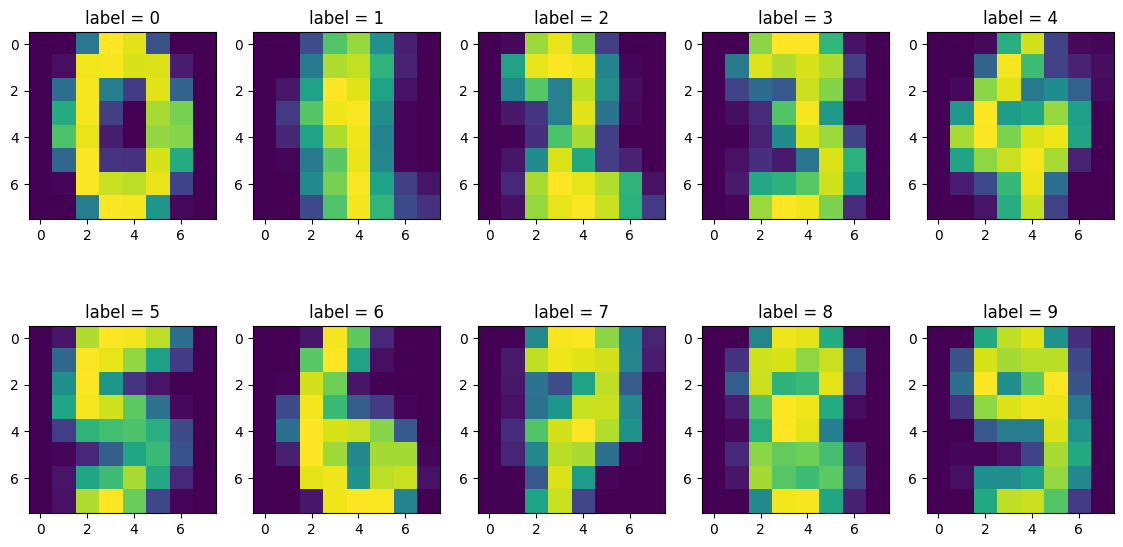

In [6]:
fig, axes=plt.subplots(2, 5, figsize=(14, 7))  # 1 row, 2 columns
for i in range(5):
    axes[0][i].imshow(class_conditionals[i].reshape(8, 8), cmap="viridis")
    axes[0][i].set_title(f"label = {i}")

for i in range(5):
    axes[1][i].imshow(class_conditionals[i+5].reshape(8, 8), cmap="viridis")
    axes[1][i].set_title(f"label = {i+5}")

# Inference

Below we calculate the posterior and class inference using the helper functions defined so that we can pred the class or label for our testing data



In [7]:
def calc_posterior(features):
    feat_class_conds=np.ones(10)  
    for c in range(10):  
        feat_class_conds[c]=np.prod(class_conditionals[c] ** features * (1 - class_conditionals[c]) ** (1 - features))
    posteriors = feat_class_conds * priors
    p_c_x = posteriors / np.sum(posteriors)
    return p_c_x

def infer_class(digit):
    posteriors=calc_posterior(digit)
    pred_label=np.argmax(posteriors)#we take the class with the highest posterior
    return pred_label

infer_ind=0

# We predict the label of our test data and Visualise it below

test_digits[0]:


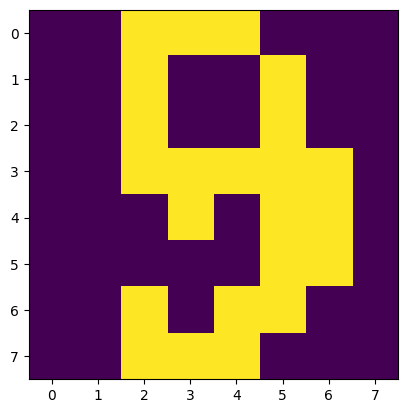

In [8]:
print(f"test_digits[{infer_ind}]:")
visualize_digit(test_digits[infer_ind])

# Confusion Matrix and Model accuracy

Below we compute the confusion matrix using the test data and use it to measure the accuracy of the Naive-Bayes model that we used to classify the digit below

In [ ]:
confusion_matrix = np.zeros((10, 10))

# TODO
for i, true_label in enumerate(test_labels):
    predicted_label=infer_class(test_digits[i])  # Predict the class
    confusion_matrix[true_label, predicted_label]+=1  # Update matrix

#print(confusion_matrix)
#Use the np.trace to sum elements of the diagonal
accuracy=np.trace(confusion_matrix)/np.sum(confusion_matrix)

print(f"Accuracy = {accuracy}")



Accuracy = 0.8722222222222222
